
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Get data

In [3]:
gpu=pd.read_csv('./pa5.csv', names=['size', 'sigma', 'comp', 'e2e','h2d', 'conv','magdir','supp','sort','hysteresis','edge','d2h','malloc','cudamalloc','cudafree'])
gpu=pd.read_csv('./pa5_2.csv', names=['size', 'sigma', 'blocksize' , 'comp', 'e2e','h2d', 'conv','magdir','supp','sort','hysteresis','edge','d2h','malloc','cudamalloc','cudafree'])
cpu=pd.read_csv('../PA2/serial/serial.csv', names=['size', 'sigma', 'comp', 'e2e', 'conv','magdir','supp','sort','hysteresis','edge'])

In [4]:
gpu['comp']=0
cpu['comp']=0

In [5]:
for i in ['conv','magdir','supp','sort','hysteresis','edge'] :
    gpu['comp']+=gpu[i]
    cpu['comp']+=cpu[i]

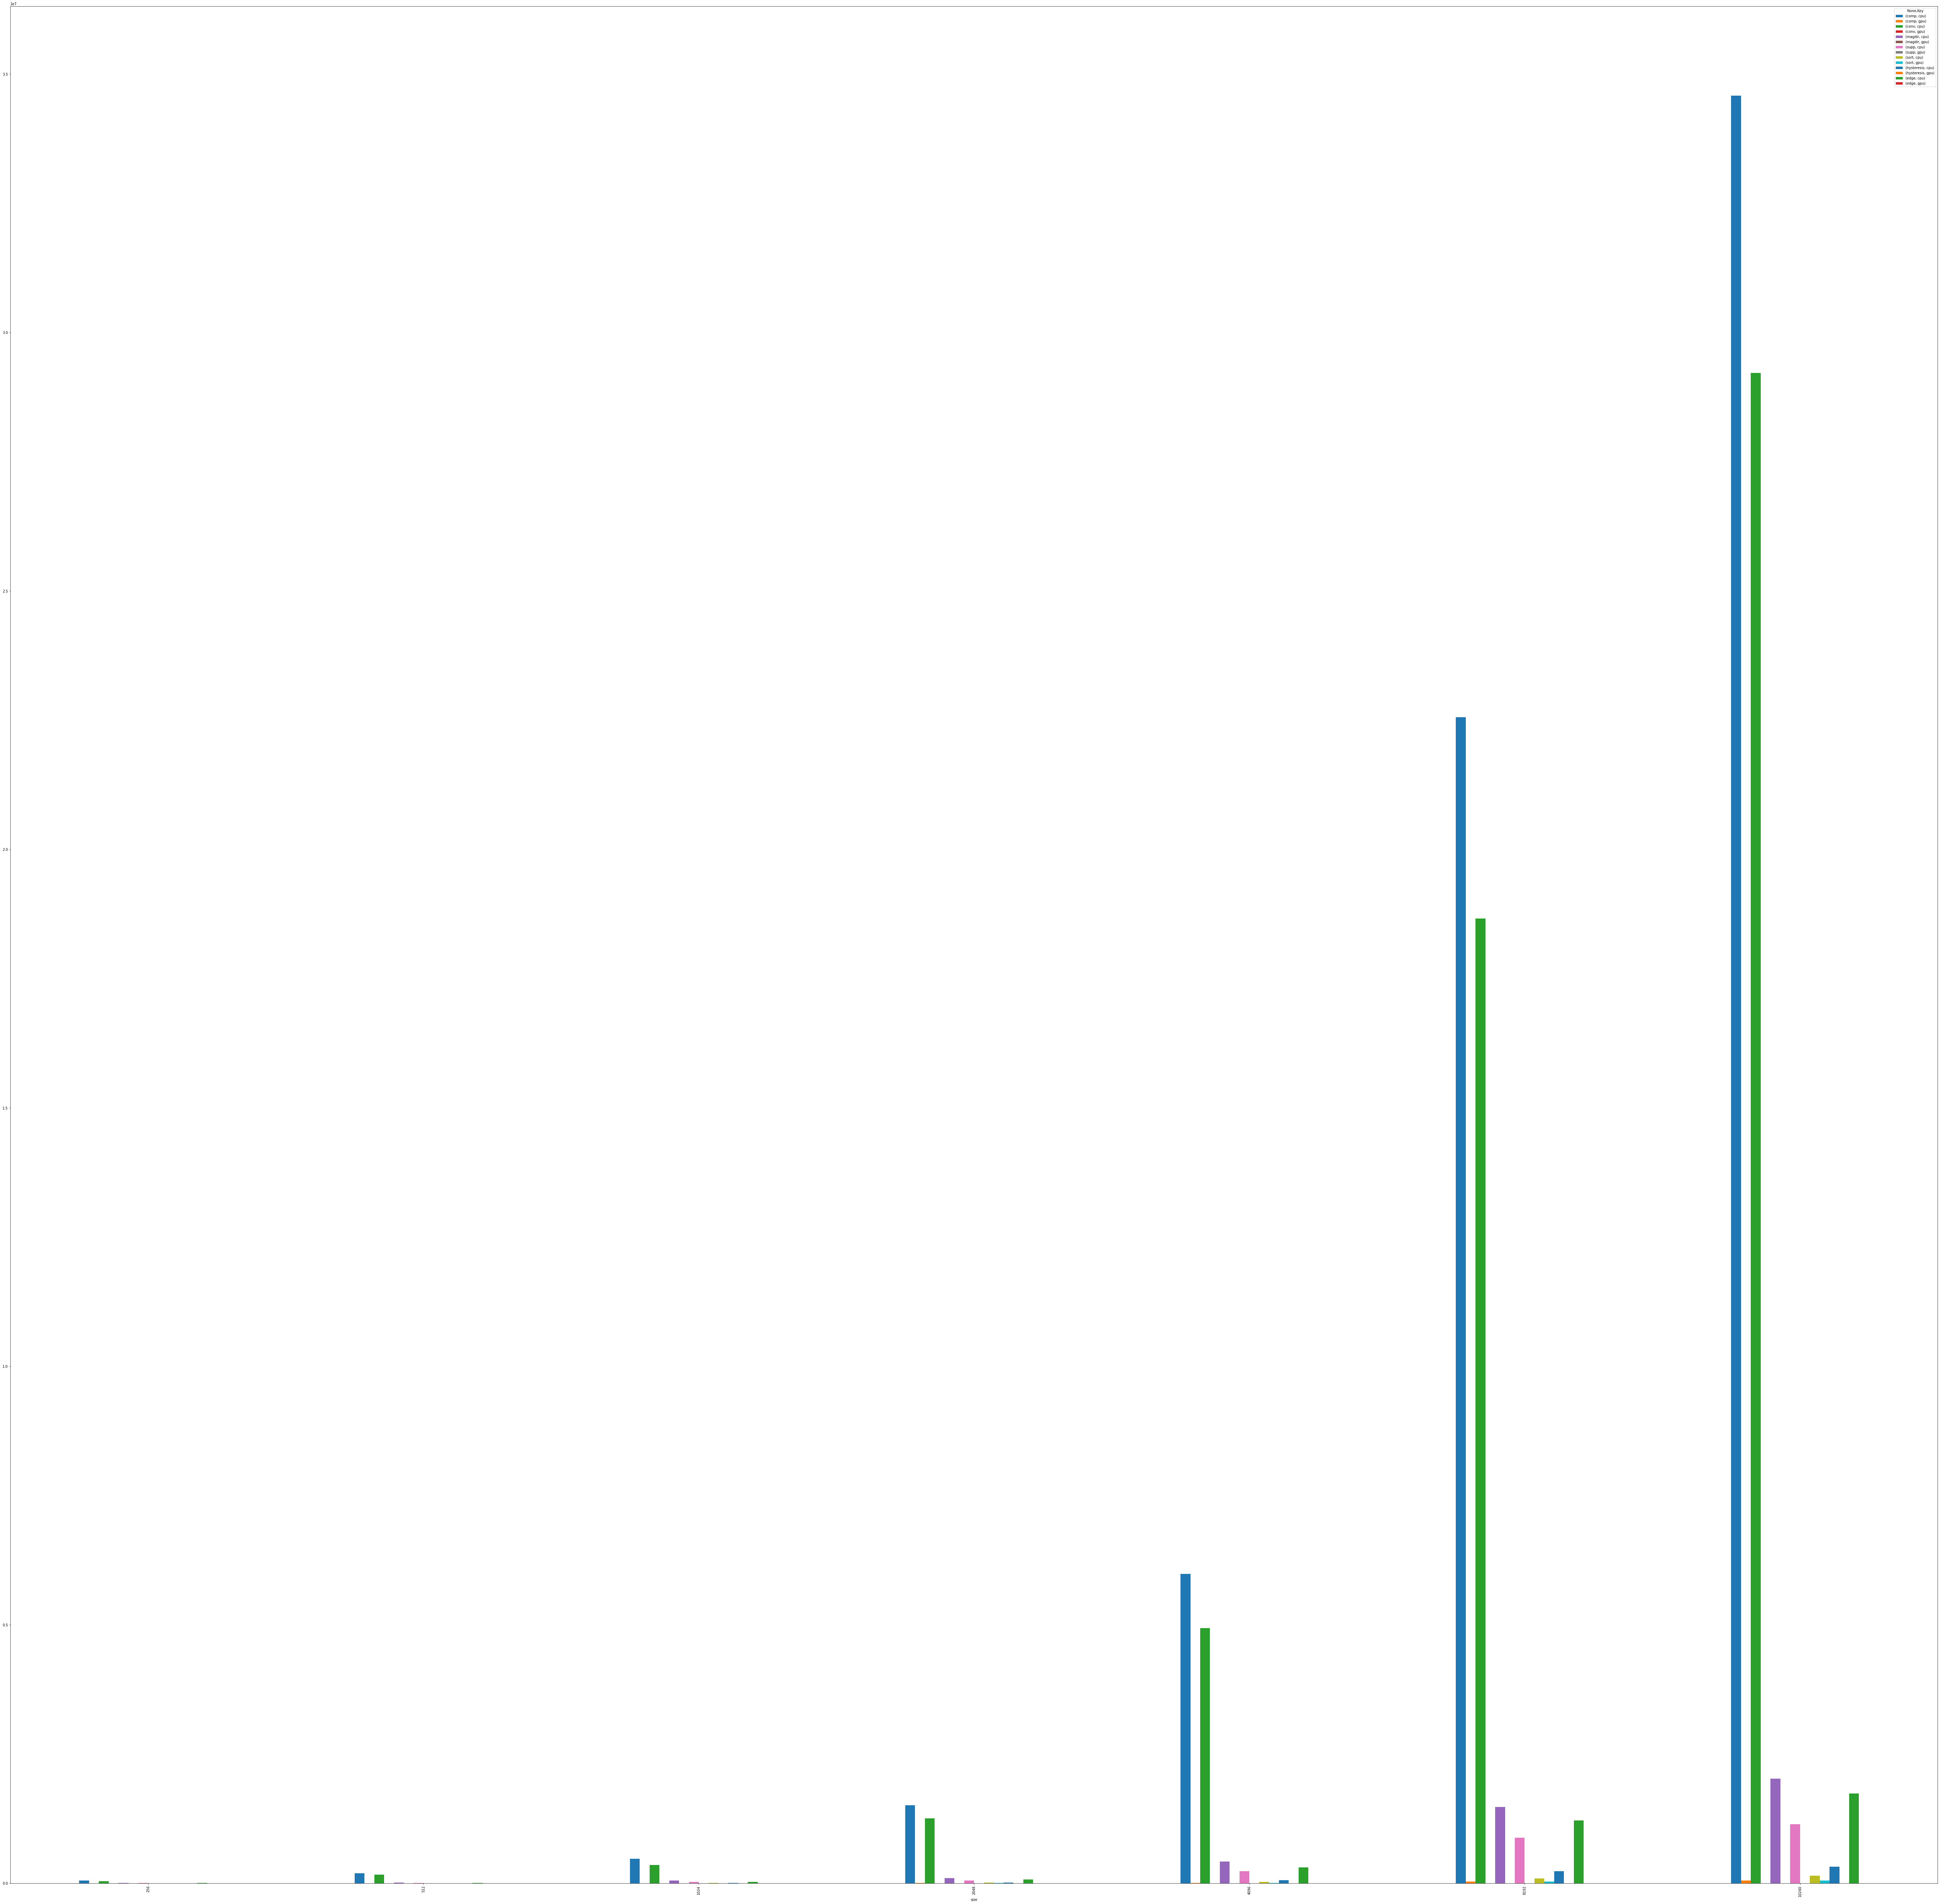

In [6]:
df1 = pd.DataFrame(gpu, columns=['size', 'comp',  'conv','magdir','supp','sort','hysteresis','edge'])
df2 = pd.DataFrame(cpu, columns=['size', 'comp',  'conv','magdir','supp','sort','hysteresis','edge'])

df1['Key'] = 'gpu'
df2['Key'] = 'cpu'

DF = pd.concat([df1,df2],keys=['gpu','cpu'])

DFGroup = DF.groupby(['size','Key'])

DFGPlot = DFGroup.mean().unstack('Key').plot(kind='bar', figsize=(100,100))

In [7]:
df1.groupby('size').mean().astype(int)

comp  conv  magdir  supp   sort  hysteresis  edge
size                                                     
256      346    58      11     5    255           9     5
512     1023    68      11     5    916          15     6
1024    1484    71      12     5   1362          25     7
2048    3067    81      13     6   2931          29     6
4096    9070    75      12     5   8939          29     6
8192   32738    67      11     5  32618          29     7
10240  49963    67      11     5  49825          46     8

In [8]:
df2.groupby('size').mean().astype(int)

comp      conv   magdir     supp    sort  hysteresis     edge
size                                                                    
256       52841     41237     4561     2959     272         724     3086
512      195730    163897    13199     7758     895        1996     7983
1024     470520    356333    53826    23811    3503        6296    26749
2048    1509239   1256785   102695    53461    9754       14254    72288
4096    5981924   4937416   422885   233157   23318       59266   305880
8192   22560052  18662164  1477553   884157   90934      230743  1214500
10240  34582676  29218078  2025454  1139190  144078      319087  1736787

In [9]:
gpu8  = gpu[gpu['blocksize']==8].groupby('size').mean().astype(int)
gpu16 = gpu[gpu['blocksize']==16].groupby('size').mean().astype(int)
gpu32 = gpu[gpu['blocksize']==32].groupby('size').mean().astype(int)

In [10]:
cpu

size  sigma      comp       e2e      conv   magdir     supp    sort  \
0     256    0.6     51574     89380     39473     4622     3027     313   
1     256    0.6     68044     71914     53740     5806     3749     306   
2     256    0.6     38905     41585     30498     3257     2101     198   
3     512    0.6    174130    181176    144529    11905     7146     880   
4     512    0.6    206861    215234    173968    13842     8006     914   
5     512    0.6    206200    214331    173196    13850     8123     892   
6    1024    0.6    441324    460177    358142    34237    18367    2918   
7    1024    0.6    516998    541467    340872    92918    34711    4689   
8    1024    0.6    453238    472608    369987    34323    18357    2903   
9    2048    0.6   1474181   1528146   1218969   103035    54723    9859   
10   2048    0.6   1419702   1475303   1167245   102968    53266    9735   
11   2048    0.6   1633835   1702590   1384143   102082    52394    9669   
12   4096    0.6   5736317   5935279   4696880   417622   233200   23162   
13   4096    0.6   6313320   6715773   5257781   433632   233191   23575   
14   4096    0.6   5896135   6301773   4857588   417402   233081   23217   
15   8192    0.6  22510630  23762649  18605934  1478748   884284   91124   
16   8192    0.6  22562237  23737593  18663683  1477890   885128   91128   
17   8192    0.6  22607291  23834958  18716877  1476023   883059   90550   
18  10240    0.6  34551070  36844608  29221621  1990660  1139557  142001   
19  10240    0.6  34440588  36535550  29104447  1995994  1141383  142282   
20  10240    0.6  34756371  36836720  29328168  2089708  1136632  147953   

    hysteresis     edge  
0          791     3348  
1          850     3593  
2          532     2319  
3         1943     7727  
4         2022     8109  
5         2025     8114  
6         5063    22597  
7         8761    35047  
8         5065    22603  
9        14487    73108  
10       14108    72380  
11       14169    71378  
12       59139   306314  
13       59532   305609  
14       59129   305718  
15      232460  1218080  
16      229935  1214473  
17      229835  1210947  
18      319410  1737821  
19      319304  1737178  
20      318548  1735362

In [11]:
cpu = cpu.groupby('size').mean().astype(int)

In [12]:
speedup8=pd.DataFrame()
for i in ['comp', 'conv', 'magdir', 'supp', 'sort', 'hysteresis', 'edge']:
    speedup8[i]=cpu[i]/gpu8[i]
speedup16=pd.DataFrame()
for i in ['comp', 'conv', 'magdir', 'supp', 'sort', 'hysteresis', 'edge']:
    speedup16[i]=cpu[i]/gpu16[i]
speedup32=pd.DataFrame()
for i in ['comp', 'conv', 'magdir', 'supp', 'sort', 'hysteresis', 'edge']:
    speedup32[i]=cpu[i]/gpu32[i]

<AxesSubplot:xlabel='size'>

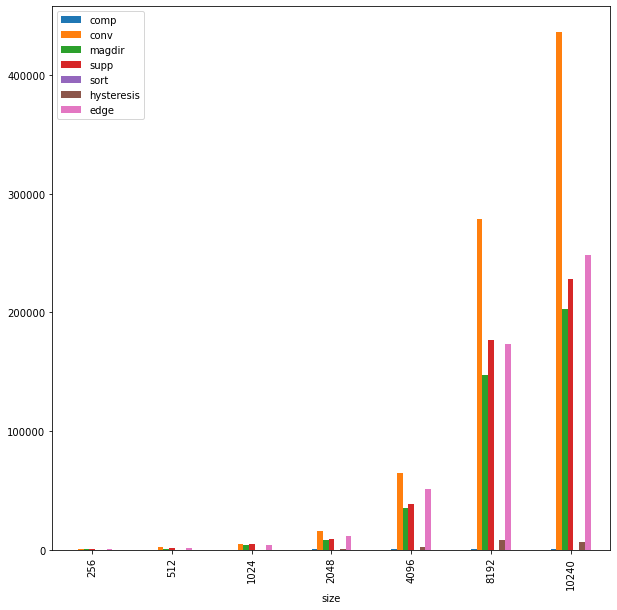

In [13]:
speedup8.plot(kind='bar', figsize=(10,10))

<AxesSubplot:xlabel='size'>

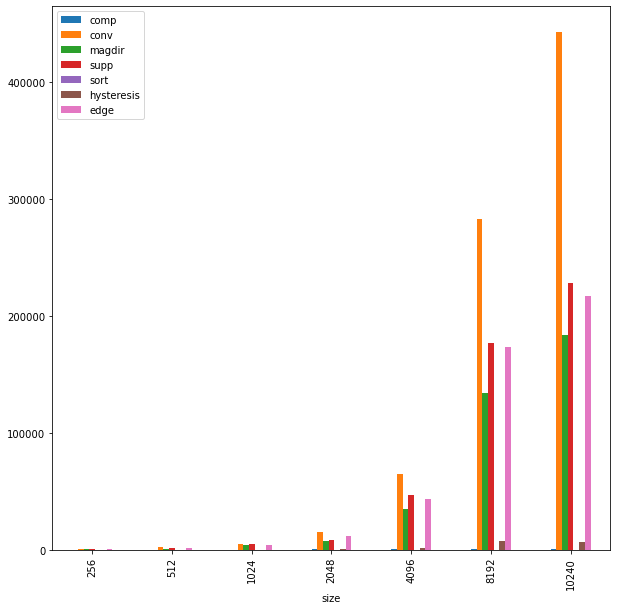

In [14]:
speedup16.plot(kind='bar', figsize=(10,10))

<AxesSubplot:xlabel='size'>

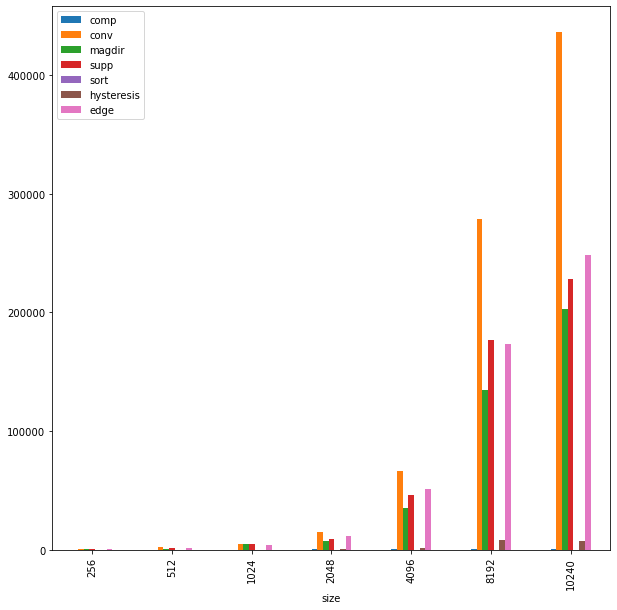

In [15]:
speedup32.plot(kind='bar', figsize=(10,10))

In [19]:
speedup16.astype(int)




comp    conv  magdir    supp  sort  hysteresis    edge
size                                                         
256     153     710     456     591     1          80     617
512     196    2521    1199    1551     1         142    1330
1024    321    5164    4893    4762     2         262    4458
2048    491   15326    7899    8910     3         491   12048
4096    659   66721   35240   46631     2        1975   50980
8192    690  278539  134323  176831     2        7956  173500
10240   689  436090  202545  227838     2        7251  248112